In [1]:
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import ensemble 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Подготовка датасета для загрузки в сеть

In [2]:
base_df = pd.read_csv('data/clean_frame.csv', index_col='ind')
base_df.columns

Index(['ID', 'Код_группы', 'Год_Поступления', 'Год_Окончания_УЗ', 'Пособие',
       'Общежитие', 'Наличие_Матери', 'Наличие_Отца', 'Опекунство', 'Село',
       'Иностранец', 'КодФакультета', 'СрБаллАттестата', 'Статус', 'one',
       'three', 'four', 'male', 'female', 'sex_summ', 'birth_year_int',
       'basis', 'language', 'country', 'region', 'city', 'parents_country'],
      dtype='object')

### Проверка и удаление отрицательных значений

In [3]:
base_df.isna().any().all()

False

In [4]:
base_df = base_df.fillna(0)

In [5]:
columns = ['Код_группы', 'Год_Поступления', 'Год_Окончания_УЗ', 'Пособие',
       'Общежитие', 'Наличие_Матери', 'Наличие_Отца', 'Опекунство', 'Село',
       'Иностранец', 'КодФакультета', 'СрБаллАттестата', 'Статус', 'male', 'female', 'sex_summ', 'birth_year_int',
       'basis', 'language', 'country', 'region', 'city', 'parents_country']

In [6]:
frame_to_train = base_df.loc[:, columns]
frame_to_train.head(2)

,Код_группы,Год_Поступления,Год_Окончания_УЗ,Пособие,Общежитие,Наличие_Матери,Наличие_Отца,Опекунство,Село,Иностранец,...,male,female,sex_summ,birth_year_int,basis,language,country,region,city,parents_country
ind,,,,,,,,,,,,,,,,,,,,,
0,16019,2015,2014.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0,1,1,1998,2,1,8,14,74,10
1,14895,2010,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,...,1,0,1,1992,4,0,8,14,74,10


## Создание тренировочного и тестового датафремов

In [7]:
train, test = train_test_split(frame_to_train, test_size=0.20)

train_input = train.drop(['Статус'], axis=1)
train_output = train['Статус']

test_input = test.drop(['Статус'], axis=1)
test_output = test['Статус']

# SKlearn модель обучения

### Тренировка модели без академического отпуска

In [8]:
#clf = RandomForestClassifier(random_state=0)
#clf = ensemble.BaggingClassifier(random_state=0)
clf = ensemble.GradientBoostingClassifier(n_estimators=100, learning_rate=0.4, max_depth=20, random_state=0)
clf.fit(train_input, train_output)


GradientBoostingClassifier(learning_rate=0.4, max_depth=20, random_state=0)

## Оценка качества модели

In [9]:
pred = clf.predict(test_input)
report = classification_report(test_output, pred)
print(report)
accure = f1_score(test_output, pred, average='macro', zero_division = 0)
accure

              precision    recall  f1-score   support

          -1       0.62      0.48      0.54       131
           3       0.84      0.78      0.81       927
           4       0.90      0.95      0.92      1659

    accuracy                           0.87      2717
   macro avg       0.78      0.74      0.76      2717
weighted avg       0.86      0.87      0.86      2717



0.7573829075414885

### Поиск лучших показателей

In [10]:
columns

['Код_группы',
 'Год_Поступления',
 'Год_Окончания_УЗ',
 'Пособие',
 'Общежитие',
 'Наличие_Матери',
 'Наличие_Отца',
 'Опекунство',
 'Село',
 'Иностранец',
 'КодФакультета',
 'СрБаллАттестата',
 'Статус',
 'male',
 'female',
 'sex_summ',
 'birth_year_int',
 'basis',
 'language',
 'country',
 'region',
 'city',
 'parents_country']

In [11]:
col_weight = columns
col_weight.remove('Статус')

<AxesSubplot:>

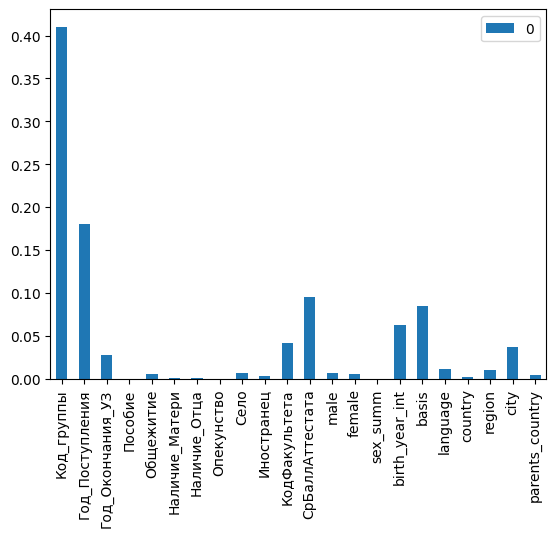

In [12]:
feature_weight = clf.feature_importances_
fet_weight = pd.DataFrame(feature_weight, index=col_weight)
fet_weight.plot.bar()